In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.load_wine(as_frame = True)

In [2]:
data = pd.concat([dataset['data'], dataset['target']], axis = 1)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
target_vc = data['target'].value_counts()
print(target_vc)

1    71
0    59
2    48
Name: target, dtype: int64


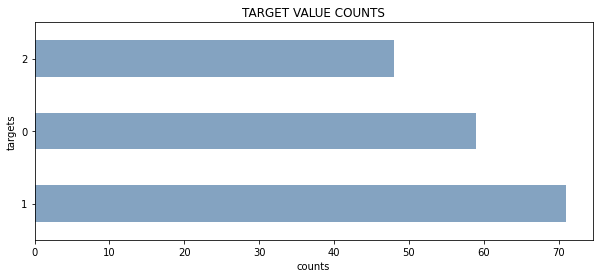

In [5]:
plt.figure(figsize = [10,4])
color = (0.2, 0.4, 0.6, 0.6)
target_vc.plot(kind = 'barh', color=color)
plt.title('TARGET VALUE COUNTS')
plt.xlabel('counts')
plt.ylabel('targets')
plt.show()

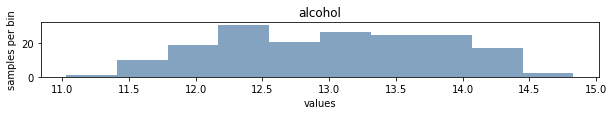

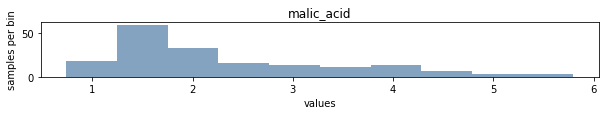

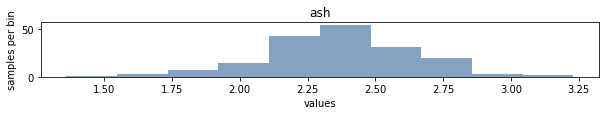

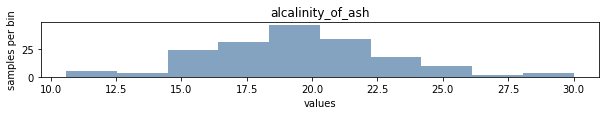

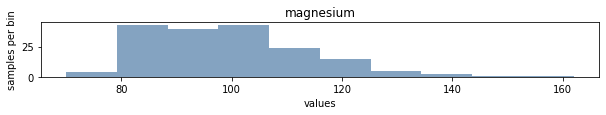

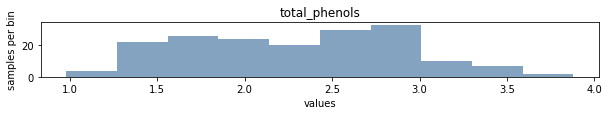

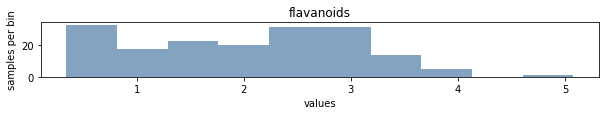

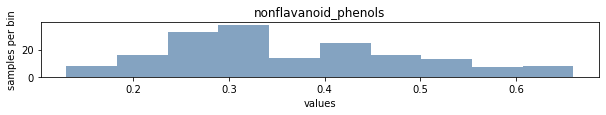

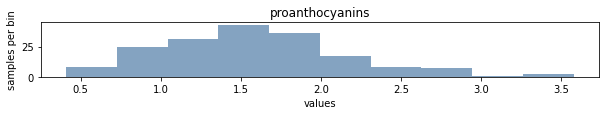

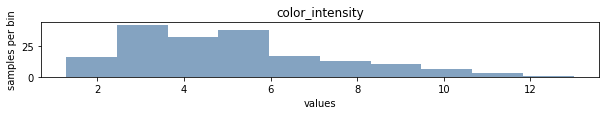

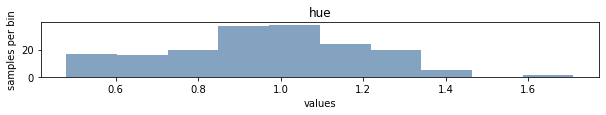

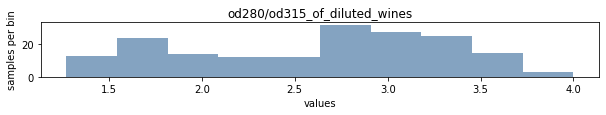

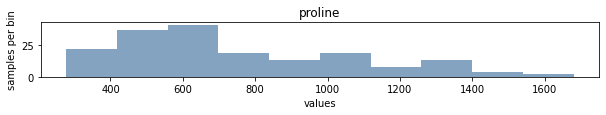

In [6]:
# Si osserva che le classi non sono composte dallo stesso numero di campioni
# Nella creazione di training set e test set per gli algoritmi di classificazione
# bisognera uniformare il numero di campioni per classe.

# CONTROLLO RISCALAMENTO DATI
for col in data.columns[0:-1]:
    plt.figure(figsize = [10,1])
    plt.hist(data[col], color = color)
    plt.title(col)
    plt.xlabel('values')
    plt.ylabel('samples per bin')
    plt.show()

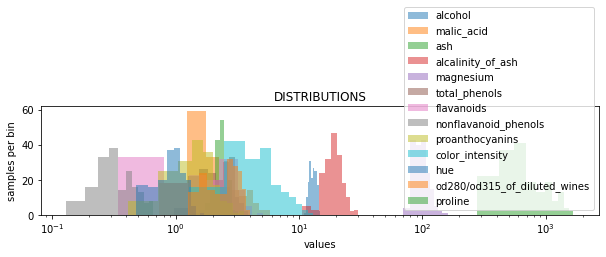

In [7]:
# dai plot è immediato osservare che non ci sono outliers, tutti i valori,
# per ogni colonna, sembrano ben distribuiti

# RISCALAMENTO DATI
# CONTROLLO RISCALAMENTO DATI
plt.figure(figsize = [10,2])
for col in data.columns[0:-1]:
    plt.hist(data[col], alpha = 0.5)
    plt.semilogx()
    plt.title('DISTRIBUTIONS')
    plt.xlabel('values')
    plt.ylabel('samples per bin')
plt.legend(data.columns)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler as MMS
x_scaled = MMS().fit_transform(data.iloc[:,0:-1])

pp_data = data.copy()

for col,x in zip(data.columns[0:-1], x_scaled.T):
    pp_data[col] = x

pp_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [9]:
targets = set(data['target'])
targets

{0, 1, 2}

In [10]:
# DISTANZIARE LE MEDIE E COMPATTARE LE VARIANZE:
# VEDI DSL LAB1
means = []
stds = []
idx = range(len(targets))
datas = []

for t,i in zip(targets,idx):
    datas.append(pp_data[pp_data['target'] == t])
    means.append([])
    stds.append([])
    for col in data.iloc[:,0:-1].columns:
        means[i].append(np.mean(datas[i][col]))
        stds[i].append(np.var(datas[i][col]))
        
means = np.array(means).T
stds = np.array(stds).T

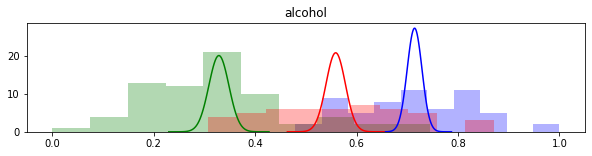

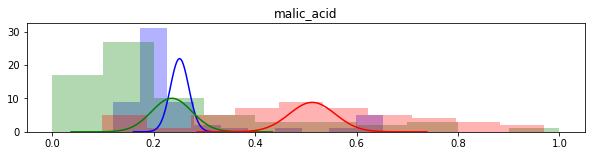

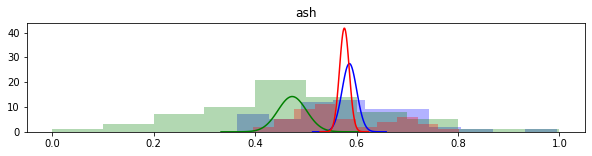

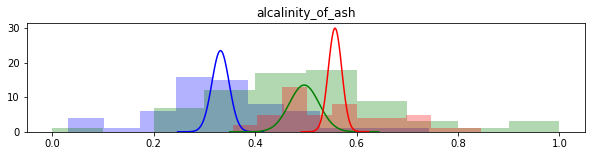

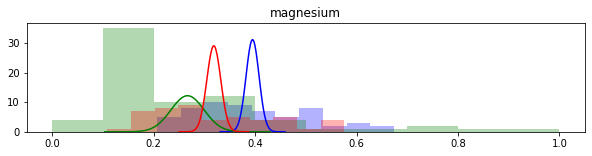

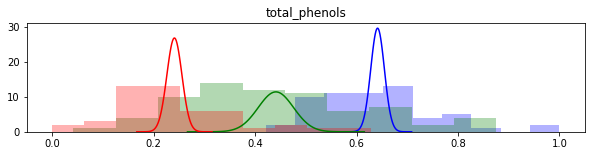

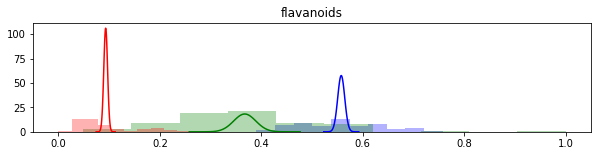

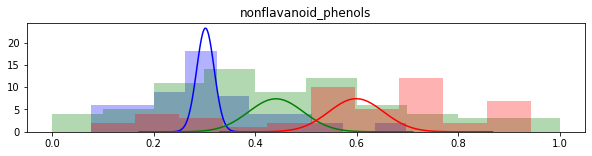

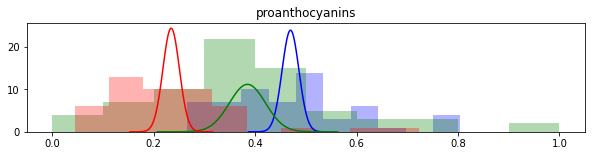

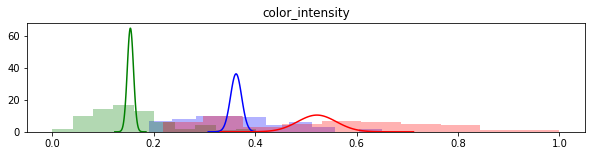

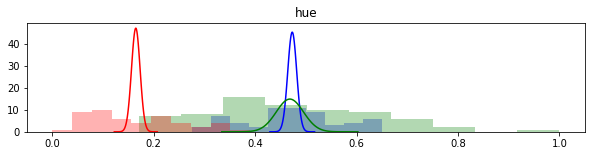

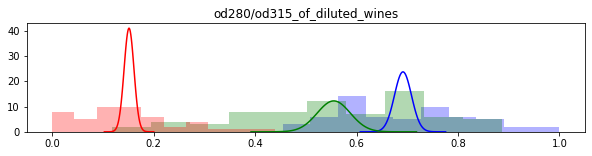

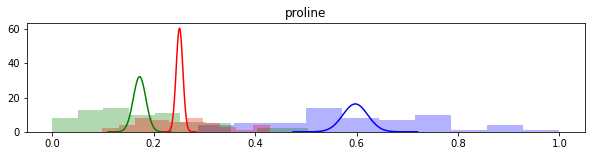

In [11]:
# plot dei risultati

from scipy.stats import norm

colors = ['b','g','r']
for col,m,v in zip(data.iloc[:,0:-1].columns, means, stds):
    plt.figure(figsize = [10,2])
    plt.title(col)
    for t,i,color in zip(targets,idx, colors):
        plt.hist(datas[i][col], color = color, alpha = 0.3)
        x = np.linspace(m[i]-5*v[i],m[i]+5*v[i],100)
        y = norm(m[i],v[i]).pdf(x)
        plt.plot(x,y, color = color)

In [12]:
# VOGLIO VEDERE QUALI SONO LE COMPONENTI PRINCIPALI CHE SPIEGANO PIU VARIANZA
from sklearn.decomposition import PCA

color = (0.2, 0.4, 0.6, 0.6)
pca = PCA().fit(pp_data.iloc[:,0:-1],pp_data['target'])

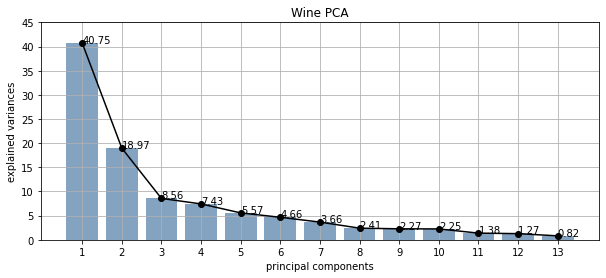

In [13]:
# scelta componenti principali
plt.figure(figsize = [10,4])
plt.plot(np.arange(1,14),pca.explained_variance_ratio_*100, 'ko')
plt.plot(np.arange(1,14),pca.explained_variance_ratio_*100, 'k')
for i,var in zip(range(1,14), pca.explained_variance_ratio_*100):
    plt.annotate(round(var,2),[i,var])
plt.bar(np.arange(1,14),height = pca.explained_variance_ratio_*100, color = color)
plt.grid()
plt.xlabel('principal components')
plt.xticks(np.arange(1,14))
plt.yticks(np.arange(0,50,5))
plt.ylabel('explained variances')
#plt.semilogy()
plt.title('Wine PCA')
plt.show()

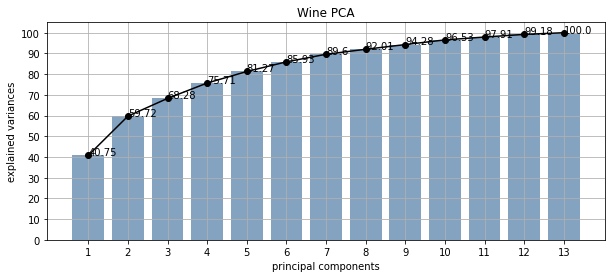

In [14]:
# controllo sulla distribuzione cumulativa
# scelta componenti principali
plt.figure(figsize = [10,4])
plt.plot(np.arange(1,14),pca.explained_variance_ratio_.cumsum()*100, 'ko')
plt.plot(np.arange(1,14),pca.explained_variance_ratio_.cumsum()*100, 'k')
for i,var in zip(range(1,14), pca.explained_variance_ratio_.cumsum()*100):
    plt.annotate(round(var,2),[i,var])
plt.bar(np.arange(1,14),height = pca.explained_variance_ratio_.cumsum()*100, color = color)
plt.grid()
plt.xlabel('principal components')
plt.xticks(np.arange(1,14))
plt.yticks(np.arange(0,110,10))
plt.ylabel('explained variances')
plt.title('Wine PCA')
plt.show()

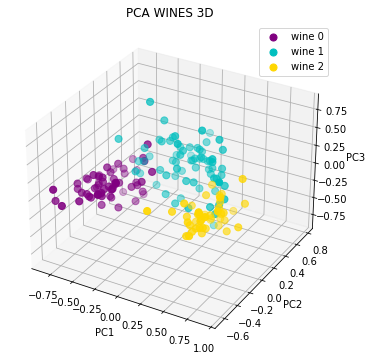

In [15]:
data_pca = pca.transform(pp_data.iloc[:,0:-1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('PCA WINES 3D')
for t,c,w in zip(targets,['purple','c','gold'],['wine 0','wine 1','wine 2']):
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.scatter(data_pca[data['target']==t][:,0],
               data_pca[data['target']==t][:,1],
               data_pca[data['target']==t][:,2],
               color = c, s = 50, label = w)
ax.legend()
fig.set_size_inches(10,6)
plt.show()

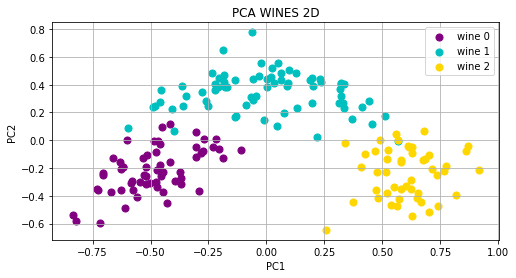

In [16]:
#2D plot
plt.figure(figsize = [8,4])
for t,c,w in zip(targets,['purple','c','gold'],['wine 0','wine 1','wine 2']):
    plt.scatter(data_pca[data['target']==t][:,0],
                data_pca[data['target']==t][:,1], 
                s = 50, color = c, label = w)
    plt.title('PCA WINES 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

X = pp_data.iloc[:,:-1]
y = pp_data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,
                                                   random_state=21,
                                                   stratify=y,shuffle=True)

In [18]:
# TEST DECISION TREE

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
dtc = DTC(criterion='entropy',max_features='log2',
          random_state=7,class_weight='balanced')
dtc.fit(X_train,y_train)
pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.91      0.87      0.89        23
           2       0.88      0.88      0.88        16

    accuracy                           0.92        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.91      0.92      0.91        59



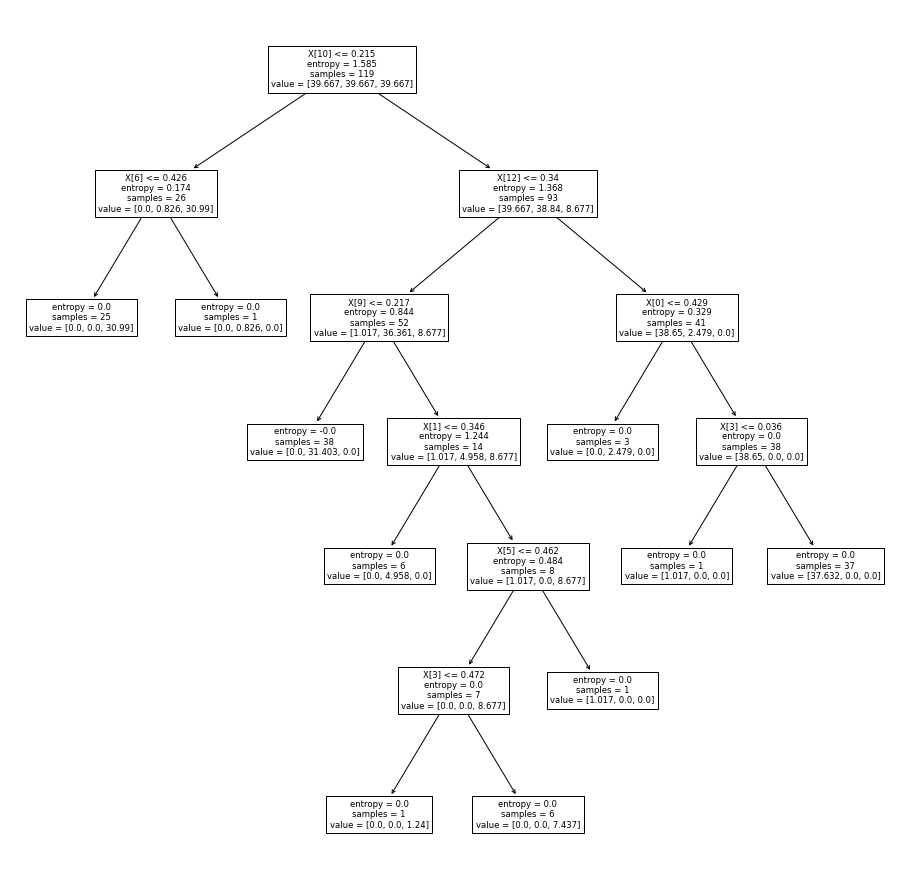

In [19]:
plt.figure(figsize=[16,16])
plot_tree(dtc)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier as CLF
rfc = CLF(n_estimators=50,criterion='entropy',
          max_features='sqrt',
          random_state=7,class_weight='balanced')
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.87      0.93        23
           2       0.89      1.00      0.94        16

    accuracy                           0.95        59
   macro avg       0.95      0.96      0.95        59
weighted avg       0.95      0.95      0.95        59



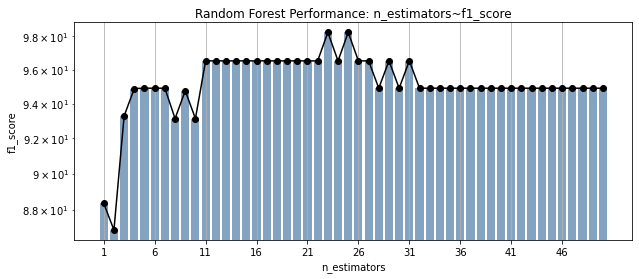

In [21]:
# TEST n_estimators
n = 1
N = 50

f1_list = []
for n_estimators in range(n,N+1):
    rfc = CLF(n_estimators=n_estimators,criterion='entropy',
          max_features='sqrt',
          random_state=7,class_weight='balanced')
    rfc.fit(X_train,y_train)
    pred_rfc = rfc.predict(X_test)
    f1_list.append(100*f1_score(y_test,pred_rfc,average='macro'))
    
plt.figure(figsize = [10,4])
plt.plot(np.arange(n,N+1),f1_list, 'ko')
plt.plot(np.arange(n,N+1),f1_list, 'k')
plt.bar(np.arange(n,N+1),height = f1_list, color = color)
plt.grid()
plt.xlabel('n_estimators')
plt.xticks(np.arange(1,50,5))
plt.yticks(np.arange(0,101,10), labels=100*np.arange(0,101,10))
plt.yscale('log')
plt.ylabel('f1_score')
plt.title('Random Forest Performance: n_estimators~f1_score')
plt.show()

In [22]:
rfc = CLF(n_estimators=12,criterion='entropy',
          max_features='sqrt',
          random_state=7,class_weight='balanced')
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.91      0.95        23
           2       0.89      1.00      0.94        16

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



In [23]:
X_pca = pca.transform(pp_data.iloc[:,0:-1])[:,0:7]

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X,y,test_size=0.33,
                                                                       random_state=21,
                                                                       stratify=y,shuffle=True)
rfc_pca = CLF(n_estimators=12,criterion='entropy',
          max_features='sqrt',
          random_state=7,class_weight='balanced')
rfc_pca.fit(X_pca_train,y_pca_train)
pred_rfc_pca = rfc_pca.predict(X_pca_test)
print(classification_report(y_pca_test, pred_rfc_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.91      0.95        23
           2       0.89      1.00      0.94        16

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

